# IMAGE CLASSIFICATION OF NUMBERS

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("x_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


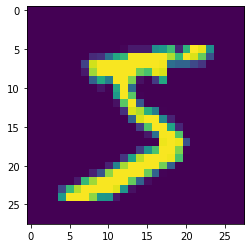

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])
plt.show()

In [5]:
y_train[0]

5

In [6]:
from keras.utils import to_categorical
y_train_enc=to_categorical(y_train)
y_test_enc=to_categorical(y_test)

Using TensorFlow backend.


In [7]:
print("y_train shape: ",y_train_enc.shape)
print("y_test shape: ",y_test_enc.shape)

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


In [8]:
y_train_enc[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
import numpy as np
x_train_rs=np.reshape(x_train,(60000,784))
x_test_rs=np.reshape(x_test,(10000,784))
print("x_train reshaped: ",x_train_rs.shape)
print("x_test reshaped: ",x_test_rs.shape)

x_train reshaped:  (60000, 784)
x_test reshaped:  (10000, 784)


In [10]:
print(set(x_train_rs[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [11]:
x_mean=np.mean(x_train_rs)
x_std=np.std(x_train_rs)
eps=1e-10
x_train_norm=(x_train_rs-x_mean)/x_std
x_test_norm=(x_test_rs-x_mean)/x_std

In [12]:
print("Normalized training set: ",set(x_train_norm[0]))
print()
print("Normalized testing set: ",set(x_test_norm[0]))

Normalized training set:  {-0.3858901621553201, 1.3069219669849146, 1.1796428595307615, 1.8033104860561113, 1.6887592893473735, 2.821543345689335, 2.7197200597260127, 1.192370770276177, 1.53602436040239, 1.7396709323290347, 2.7960875241985046, 2.6560805059989363, 2.18514780841857, 2.4906176663085375, -0.10587612575618353, 2.681536327489767, 0.03413089244338476, -0.19497150097409063, 0.7723497156774721, 0.9378125553678709, -0.2458831439557518, 2.210603629909401, 1.9051337720194337, 1.2687382347486686, 1.7651267538198654, -0.424073894391566, 0.41596821480584373, -0.2840668761919977, 0.27596119660627544, 1.4596568959298981, 1.2941940562394993, 2.096052433200663, 1.9560454150010949, 2.7579037919622587, 1.4851127174207288, -0.09314821501076823, 2.783359613453089, 2.286971094381893, 2.4524339340722916, 1.3451056992211605, -0.042236572029107036, 2.643352595253521, -0.13133194724701414, 0.7596218049320568, 0.28868910735169073, 0.6068868759870732, 0.6196147867324885, -0.4113459836461507, 0.4668

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(380, activation = 'relu', input_shape = (784,)),
    Dense(380, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [14]:
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 380)               298300    
_________________________________________________________________
dense_1 (Dense)              (None, 380)               144780    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3810      
Total params: 446,890
Trainable params: 446,890
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(
    x_train_norm,
    y_train_enc,
    epochs = 10
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3267 - accuracy: 0.9061
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1623 - accuracy: 0.9532
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1195 - accuracy: 0.9657
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0948 - accuracy: 0.9728
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0780 - accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0650 - accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0554 - accuracy: 0.9843
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0475 - accuracy: 0.9870
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0406 - accuracy: 0.9894
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.035

In [16]:
loss1, accuracy1 = model.evaluate(x_test_norm, y_test_enc)
loss2, accuracy2 = model.evaluate(x_train_norm, y_train_enc)
print('test set accuracy: ', accuracy1 * 100)
print('train set accuracy: ', accuracy2 * 100)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0297 - accuracy: 0.9932
test set accuracy:  97.7400004863739
train set accuracy:  99.3233323097229


In [17]:
print('shape of model: ', model.predict(x_test_norm).shape)

shape of model:  (10000, 10)


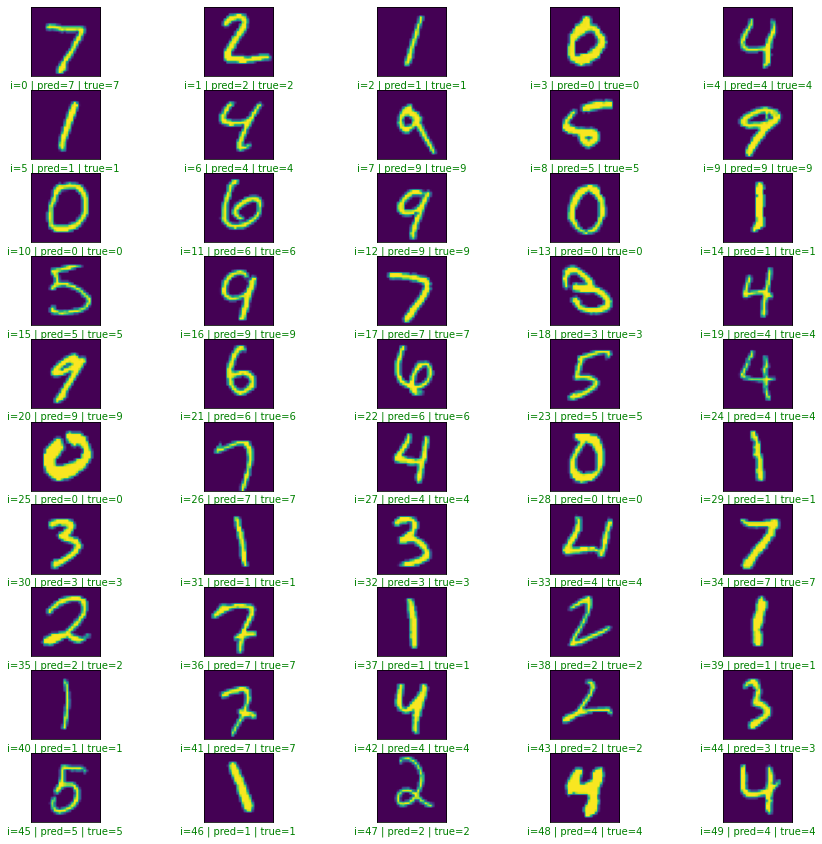

In [18]:
plt.figure(figsize = (15, 15))
preds = model.predict(x_test_norm)
start = 0

for i in range(50):
    plt.subplot(10, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start + i])
    actual = np.argmax(y_test_enc[start + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start + i, pred, actual), color = col)
    plt.imshow(x_test[start + i])
plt.show()